In [1]:
!pip install transformers yfinance requests beautifulsoup4 textblob

import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# NLP Sentiment Analysis - Fetch & Analyze Financial News 

In [2]:
def get_news():
    url = "https://finance.yahoo.com/news/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    news_headlines = []
    for item in soup.find_all('h3'):
        news_headlines.append(item.text)

    return news_headlines

# Sentiment Analysis
sentiment_model = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

def analyze_sentiment(news_list):
    sentiments = []
    for news in news_list:
        result = sentiment_model(news)[0]
        sentiments.append({"headline": news, "sentiment": result['label']})
    
    return pd.DataFrame(sentiments)

news_data = get_news()
sentiment_df = analyze_sentiment(news_data)
print(sentiment_df.head())


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


         headline sentiment
0            News   4 stars
1            Life   5 stars
2   Entertainment   4 stars
3         Finance   4 stars
4          Sports   4 stars


# Stock Price Analysis & Trend Detection (Time-Series)

[*********************100%***********************]  1 of 1 completed


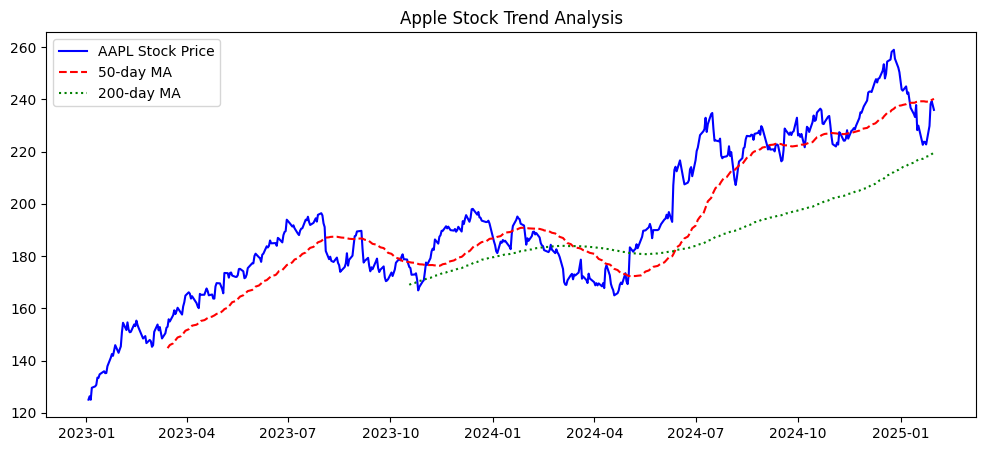

In [3]:
# Load Stock Data from Yahoo Finance
stock_data = yf.download('AAPL', start='2023-01-01', end='2025-02-01')

# Moving Average Calculation
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Plot Stock Trends
plt.figure(figsize=(12,5))
plt.plot(stock_data['Close'], label='AAPL Stock Price', color='blue')
plt.plot(stock_data['50_MA'], label='50-day MA', linestyle="dashed", color='red')
plt.plot(stock_data['200_MA'], label='200-day MA', linestyle="dotted", color='green')
plt.legend()
plt.title("Apple Stock Trend Analysis")
plt.show()


# AI-Powered Market Movement Prediction (LSTM Model)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.1577
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0105
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0061
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0036
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

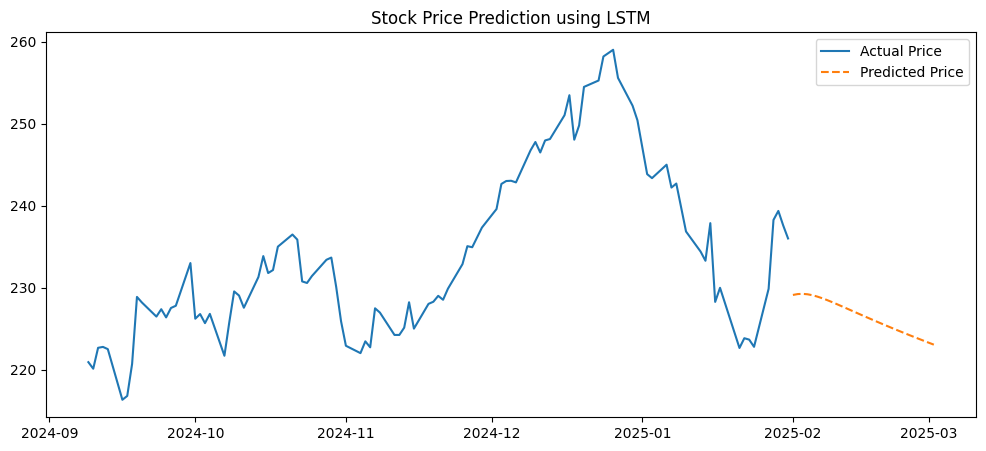

In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data[['Close']])

X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile & Train Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=5)

# Predict Next 30 Days
future_days = 30
future_inputs = scaled_data[-60:].reshape(1,60,1)
predicted_prices = []

for _ in range(future_days):
    pred_price = model.predict(future_inputs)
    predicted_prices.append(pred_price[0][0])
    future_inputs = np.append(future_inputs[:,1:,:], pred_price.reshape(1,1,1), axis=1)

# Convert back to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1,1))

# Plot Predictions
plt.figure(figsize=(12,5))
plt.plot(stock_data.index[-100:], stock_data['Close'].iloc[-100:], label="Actual Price")
plt.plot(pd.date_range(stock_data.index[-1], periods=future_days+1)[1:], predicted_prices, label="Predicted Price", linestyle="dashed")
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.show()
